<a href="https://colab.research.google.com/github/mystica2000/MachineLearning/blob/master/Image%20colourization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.layers import Conv2D, UpSampling2D, InputLayer
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
from skimage.io import imsave
import numpy as np
import os
import random
import tensorflow as tf

In [18]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [19]:
PATH_OF_DATA= '/content/gdrive/"My Drive"/Data'
!ls {PATH_OF_DATA}

 800px_COLOURBOX2279782.jpg
 b.jpg
 black-and-white-waves-close-up-view-circle-823.jpg
 boom.jpg
 building100.jpg
 building10.jpg
 building11.jpg
 building12.jpg
 building1.jpg
 building202.jpg
 building203.jpg
 building204.jpg
 building205.jpg
 building206.jpg
 building207.jpg
 building208.jpg
 building2.jpg
'building3 (1).jpg'
 building3.jpg
 building4.jpg
 building5.jpg
 building6.jpg
 building7.jpg
 building8.jpg
 building97.jpg
 building98.jpg
 building99.jpg
 building9.jpg
 city.jpg
 gettyimages-502780150-612x612.jpg
 gettyimages-954560222-612x612.jpg
 light-lantern-street-black-688310.jpeg
 pexels-photo-1038935.jpeg
 resize.jpg
 sorna.jpg
 woman.jpg


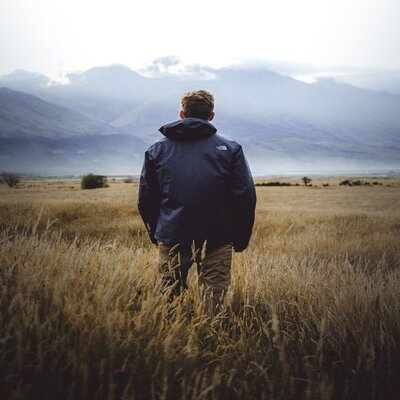

In [20]:
from IPython.display import Image, display
display(Image(filename='/content/gdrive/My Drive/Data/boom.jpg'))

In [0]:
image = img_to_array(load_img('/content/gdrive/My Drive/Data/boom.jpg'))
image = np.array(image, dtype=float)

In [0]:
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))

model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))

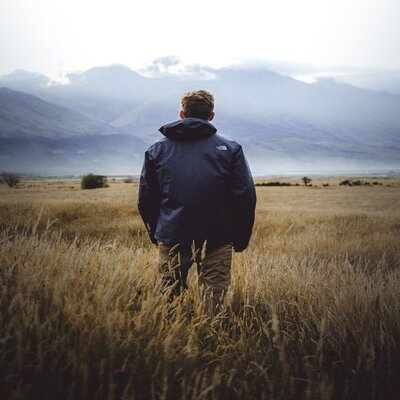

In [23]:
from IPython.display import Image, display
display(Image(filename='/content/gdrive/My Drive/Data/boom.jpg'))

In [0]:
X = rgb2lab(1.0/255*image)[:,:,0]
Y = rgb2lab(1.0/255*image)[:,:,1:]
Y /= 128
X = X.reshape(1, 400, 400, 1)
Y = Y.reshape(1, 400, 400, 2)

In [0]:
model.compile(optimizer='rmsprop',loss='mse')

In [26]:
model.fit(x=X, 
    y=Y,
    batch_size=1,
    epochs=10)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.0118
Epoch 2/10
1/1 [==============================] - 1s 779ms/step - loss: 0.5137
Epoch 3/10
1/1 [==============================] - 1s 798ms/step - loss: 0.1241
Epoch 4/10
1/1 [==============================] - 1s 800ms/step - loss: 0.0059
Epoch 5/10
1/1 [==============================] - 1s 791ms/step - loss: 0.0055
Epoch 6/10
1/1 [==============================] - 1s 782ms/step - loss: 0.0052
Epoch 7/10
1/1 [==============================] - 1s 819ms/step - loss: 0.0050
Epoch 8/10
1/1 [==============================] - 1s 799ms/step - loss: 0.0050
Epoch 9/10
1/1 [==============================] - 1s 776ms/step - loss: 0.0050
Epoch 10/10
1/1 [==============================] - 1s 718ms/step - loss: 0.0048


In [27]:
print(model.evaluate(X, Y, batch_size=1))
output = model.predict(X)
output *= 128
# Output colorizations
cur = np.zeros((400, 400, 3))
cur[:,:,0] = X[0][:,:,0]
cur[:,:,1:] = output[0]
#imsave("img_result.png",)
imsave("img_result.png", lab2rgb(cur))
imsave("img_gray_version.png", rgb2gray(lab2rgb(cur)))

1/1 [==============================] - 0s 233ms/step
0.004801120609045029


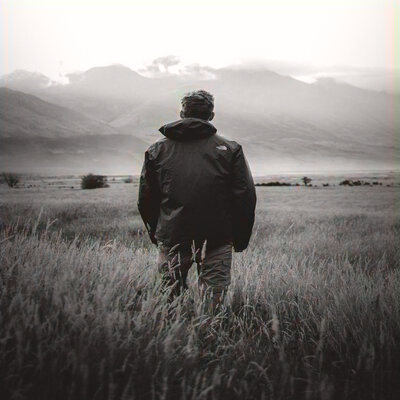

In [28]:
from IPython.display import Image, display
display(Image(filename='img_result.png'))

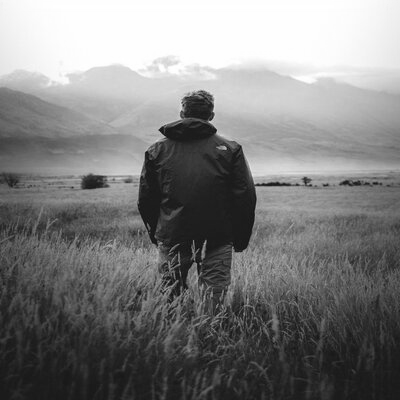

In [29]:
from IPython.display import Image, display
display(Image(filename='img_gray_version.png'))

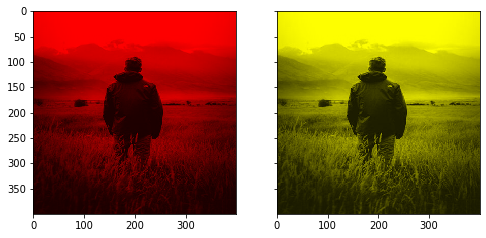

In [30]:
import matplotlib.pyplot as plt
from skimage import data
from skimage import color
from skimage import img_as_float

grayscale_image = rgb2gray(lab2rgb(cur))
image = color.gray2rgb(grayscale_image)

red_multiplier = [1, 0, 0]
yellow_multiplier = [1, 1, 0]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4),
                               sharex=True, sharey=True)
ax1.imshow(red_multiplier * image)
ax2.imshow(yellow_multiplier * image)

(400, 400, 3)


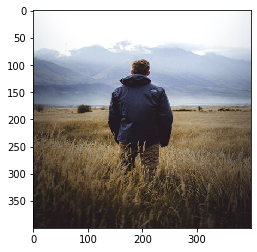

In [45]:
pic = plt.imread('/content/gdrive/My Drive/Data/boom.jpg')/255  # dividing by 255 to bring the pixel values between 0 and 1
#pic = plt.imread(cur)/255  # dividing by 255 to bring the pixel values between 0 and 1

print(pic.shape)
plt.imshow(pic)

In [40]:
pic_n = pic.reshape(cur.shape[0]*cur.shape[1], cur.shape[2])
pic_n.shape

(160000, 3)

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

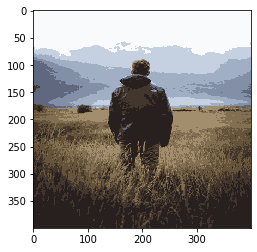

In [44]:
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
plt.imshow(cluster_pic)